Toronto Blue Jays/ New York Yankees Home Opener - Twitter Analysis
------------------------------------------------

All tweeting activity from 11:50am until 10 minutes after the end of the game.

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)
import pymongo
from pymongo import MongoClient

client = pymongo.MongoClient('localhost', 27017)

db = client.jays_opener
collection = db['Tweets']
cursor = collection.find()

In [47]:
df = pd.DataFrame(list(cursor))
df[:3]

,_id,geo,location,name,screen_name,source,text,time
0,5522ab2b7e9aed108af53689,None,"Altona, Manitoba",Kelvin Heppner,RealAg_Kelvin,TweetDeck,Crop plans and projections for #BlueJays new s...,11:50
1,5522ab2c7e9aed108af5368a,None,"Burlington, Ontario, Canada",Brian Cappellaro,bcappellaro,Twitter for BlackBerry,RT @Wilnerness590: Happy Opening Day!!! #Bluej...,11:50
2,5522ab2e7e9aed108af5368b,None,,Brad Funk,FunkBrad,Twitter for iPhone,RT @SiddallJoe: Happy Opening Day from #Yankee...,11:50


In [48]:
df.set_index('time', drop=False, inplace=True)
df.index

Index([u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:50', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:51', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'11:52', u'1

In [49]:
df.head()

,_id,geo,location,name,screen_name,source,text,time
time,,,,,,,,
11:50,5522ab2b7e9aed108af53689,None,"Altona, Manitoba",Kelvin Heppner,RealAg_Kelvin,TweetDeck,Crop plans and projections for #BlueJays new s...,11:50
11:50,5522ab2c7e9aed108af5368a,None,"Burlington, Ontario, Canada",Brian Cappellaro,bcappellaro,Twitter for BlackBerry,RT @Wilnerness590: Happy Opening Day!!! #Bluej...,11:50
11:50,5522ab2e7e9aed108af5368b,None,,Brad Funk,FunkBrad,Twitter for iPhone,RT @SiddallJoe: Happy Opening Day from #Yankee...,11:50
11:50,5522ab307e9aed108af5368c,None,Earth/Canada,Kevin Rudy™,RudyRudy85,Twitter for iPhone,RT @BlueJays: One nation. One team. #ComeToget...,11:50
11:50,5522ab337e9aed108af5368d,None,Boston area,Jon Papernick,Jonnypapers,Twitter for iPhone,#bluejays #gojays #openingday #mlb http://t.co...,11:50


In [50]:
cities = ['Toronto', 'TO', 'Montreal', 'Timmins', 'Ottawa', 'Ontario', 'Quebec', 'Canada', 'NY', 'New York', 'N.Y.']
for i in cities:
    print "{} - {}".format(i, df.location.str.contains(i).sum())

Toronto - 3554
TO - 77
Montreal - 50
Timmins - 9
Ottawa - 313
Ontario - 2163
Quebec - 13
Canada - 3233
NY - 300
New York - 155
N.Y. - 4


Total number of tweets with the word BlueJays.  11:50am to 4:27pm.
---------------------------------------------------------------------

In [51]:
total_tweets = pd.Series.count(df['time'])

Show the heaviest tweeting times
-------------------------------------

That peak is the Edwin Encarnacion HR in the 3rd.

A little after 3pm Devon Travis causes a stir with his first major league hit, a HR no less.

The last peak is the end of the game when twitter activity always spikes.

In [86]:
dbase_names = pd.Series.value_counts(df['name'], normalize=False, sort=True, ascending=False, bins=None)
#dbase_names = pd.Series.value_counts(df['name'])
len(dbase_names.values.ravel())
#dbase_names

11445

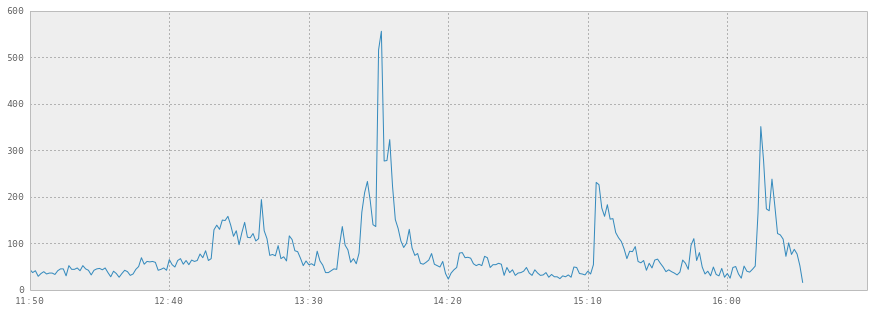

In [52]:
dbase1m = pd.Series.value_counts(df['time'], normalize=False, sort=True, ascending=False, bins=None)
tweet_freq = dbase1m.sort_index()
tweet_freq.plot()

Average tweets per minute during the game
----------------------------------------------------

In [53]:
avg = int(dbase1m.mean())
avg

77

Most frequent locations tweeted from during the game
-----------------------------------------------------------------
This is all over the place because anyone is free to put any location they want in twitter.

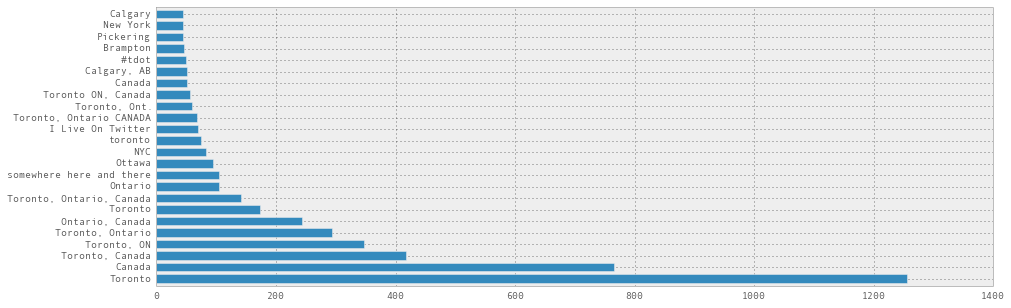

In [54]:
tweeted_from = pd.Series.value_counts(df['location'], normalize=False, sort=True, ascending=False, bins=None)
tweeted_from[1:25].plot(kind='barh')

In [55]:
tweeted_from[1:50]

Toronto                       1256
Canada                         766
Toronto, Canada                417
Toronto, ON                    348
Toronto, Ontario               294
Ontario, Canada                243
Toronto                        173
Toronto, Ontario, Canada       142
Ontario                        105
somewhere here and there       105
Ottawa                          95
NYC                             83
toronto                         74
I Live On Twitter               69
Toronto, Ontario CANADA         68
Toronto, Ont.                   59
Toronto ON, Canada              57
Canada                          52
Calgary, AB                     51
#tdot                           49
Brampton                        47
Pickering                       45
New York                        45
Calgary                         45
Vancouver, BC                   43
Ottawa, Ontario                 43
Kingston, Ontario               42
Ottawa, ON                      42
London, Ontario     

Todays Top 5 Tweets
--------------------

In [56]:
top_tweet = pd.Series.value_counts(df['text'], normalize=False, sort=True, ascending=False, bins=None)
top_tweet[:5]

RT @BlueJays: Here we go! #ComeTogether http://t.co/k0nROIrqhM    725
RT @BlueJays: If this message gets 12,000 RTs by the end of tonight's game, 1 lucky fan will win a signed @Robbiealomar jersey #whiff #12in…    721
RT @BlueJays: Nothing like an #OpeningDay win! FINAL: @BlueJays 6, Yankees 1. #ComeTogether    577
RT @BlueJays: BOOM. @encadwin crushes a two-run homer to left as the @BlueJays lead the Yankees, 5-0! #ComeTogether #OpeningDay    444
RT @pmharper: As the @BlueJays start another season, let's all #cometogether and show the baseball world what Canada can do. Let's go Blue …    431
dtype: int64

The day's top tweeters
-------------------------

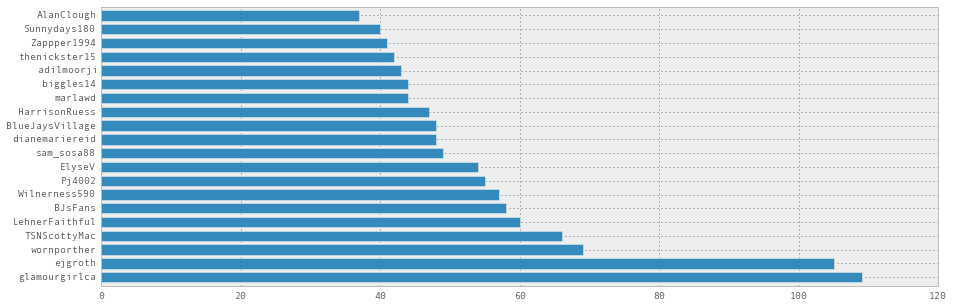

In [66]:
top_tweeter = pd.Series.value_counts(df['name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name = pd.Series.value_counts(df['screen_name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name[:20].plot(kind='barh')

The most popular platforms for tweeting
--------------------------------------------

Iphones are pretty much the most popular with baseball fans.

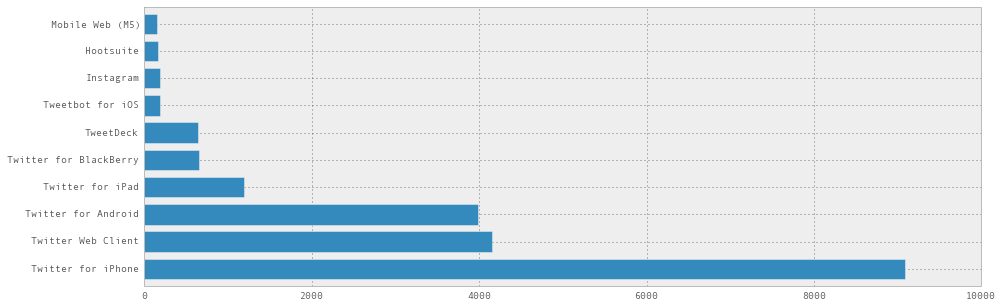

In [58]:
source_tweet = pd.Series.value_counts(df['source'], normalize=False, sort=True, ascending=False, bins=None)
source_tweet[:10].plot(kind='barh')

The following code simply filters out common words like "the" & "and" etc. etc.
------------------------------------------------------------------------------------------

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
stop = stopwords.words('english')
stop2 = stopwords.words('spanish')
otherwords = ['rt', 'vs', '-', '&amp;', '', '/', 'it\'s']
text = df['text']
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])

In [60]:
filtered_tokens = [w for w in tokens if not w in stop]
filtered_tokens_spanish = [w for w in filtered_tokens if not w in stop2]
other_filtered = [w for w in filtered_tokens_spanish if not w in otherwords]
freq_dist = nltk.FreqDist(other_filtered)
z = 20
print "The {} most common words tweeted;".format(z)
x = sorted(freq_dist, key=lambda key: (-freq_dist[key], key))[:z]
for entry  in x:
    print entry

The 20 most common words tweeted;
@bluejays
#bluejays
#cometogether
#openingday
first
season
go
game
let's
1
#yankees
yankees
home
lead
win
baseball
day
opening
run
hit


Plotting the top words
-------------------------

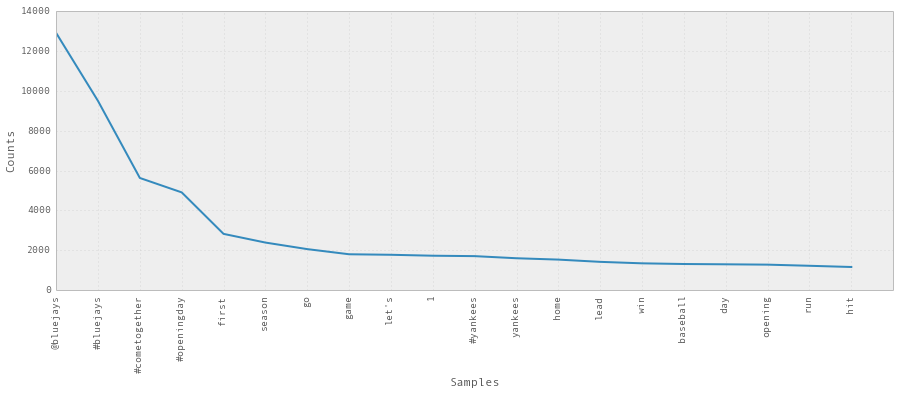

In [61]:
freq_dist.plot(20)

Use Folium to plot geo coordinates on a map
-------------------------------------------------
Only 2% of twitter users display geo coordinates when tweeting.  Still gives an interesting map of tweet locations.

In [62]:
import folium
from collections import namedtuple
filepath = "/home/al/projects/twitter/geo/jaysgeo.html"
na_coordinates = (43.641438,-79.389353) # Rogers Centre Toronto, Ontario
na_map = folium.Map(location=na_coordinates, zoom_start=4)
Location = namedtuple('Location', ['latitude', 'longitude'])
count_locations = 0

for line in df.geo:
    if line != None:
        count_locations += 1
        geo_coordinates = line['coordinates']
        location = Location(geo_coordinates[1], geo_coordinates[0])
        na_map.circle_marker(location, popup=str(location))

na_map.create_map(filepath)

In [63]:
print str(count_locations) + " users reporting coordinates"
print str(total_tweets) + " total tweets"
percent = round(float(count_locations) / float(total_tweets) * 100, 2)
print str(percent) + "%"

436 users reporting coordinates
21656 total tweets
2.01%


Plot those tweets on a graph
============

While only 2% of users were reporting their coordinates this is still enough to give us an idea where they are tweeting from.  


Pretty solid support out West too.  Canada's Team

In [64]:
from IPython.display import HTML
HTML('<iframe src=http://www.linuxnorth.org/jaysopener_geo.html width=960 height=530></iframe>')